<a href="https://colab.research.google.com/github/ngoax/MathAgent/blob/main/Tool_calling_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !sudo apt-get update && sudo apt-get install -y cuda-drivers

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Could not get lock /var/lib/dpkg/lock-frontend. It is held by proce

Sometimes colab throws an error for UTF-8, please then execute this code snippet and try again

In [ ]:
import locale
def getpreferredencoding():
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

Install dependencies

In [ ]:
!pip install langchain
!pip install --upgrade --quiet numexpr
!pip install -qU langchain-docling
!pip install docling
!pip install langgraph
!pip install -U ollama
!pip install -U langchain-ollama
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers  numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 20.4 MB/s eta 0:00:00
   

Set up Langsmith to be able to inspect agent later on ([generate api key](https://smith.langchain.com/))

In [ ]:
import getpass
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········


 Set up gemini ([you need to generate an api](https://ai.google.dev/gemini-api/docs/api-key))

In [ ]:
if "GOOGLE_API_KEY" not in os.environ:
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [ ]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.17 which is incompatible.


In [41]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

Set up ollama

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to render group...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import subprocess
process = subprocess.Popen("ollama serve", shell=True)

Try these models next:

*   llama 3 70b
*   https://ollama.com/adrienbrault/nous-hermes2pro-llama3-8b
*	  https://ollama.com/adrienbrault/nous-hermes2theta-llama3-8b

In [ ]:
!ollama pull llama3.2:3b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕▏   96 B                         
pulling 34bb5ab01051... 100% ▕▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
from langchain_ollama import ChatOllama
model = ChatOllama(
    model = "llama3.2:3b",
    temperature = 0.8,
    num_predict = 256,
    # other params ...
)

Set up math tool

In [ ]:
import math
import numexpr

def calculator(expression: str) -> str:
    """Calculate expression using Python's numexpr library.

    Expression should be a single line mathematical expression
    that solves the problem.

    Examples:
        "37593 * 67" for "37593 times 67"
        "37593**(1/5)" for "37593^(1/5)"
    """
    local_dict = {"pi": math.pi, "e": math.e}
    return str(
        numexpr.evaluate(
            expression.strip(),
            global_dict={},  # restrict access to globals
            local_dict=local_dict,  # add common mathematical functions
        )
    )


Set up pdf reader

In [ ]:
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.datamodel.base_models import InputFormat

# for Markdown rendering in Colab
from IPython.display import display, Markdown

def pdfFormula(filepath:str):
  """ get file content using docling

  Args:
      filepath (str): path to file

  Returns:
      str: file content
  """

  pipeline_options = PdfPipelineOptions()
  pipeline_options.do_formula_enrichment = True
  images_scale: float = 1

  converter = DocumentConverter(format_options={
      InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
  })

  result = converter.convert(filepath)
  # doc = result.document.export_to_markdown()

  # display(Markdown(doc))


  return result


Set up chatbot with tool-calling enabled ([credit](https://langchain-ai.github.io/langgraph/tutorials/introduction/#setup))

In [ ]:
from typing import Annotated
from langchain_core.messages import BaseMessage, SystemMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import MessagesState

tools = [calculator, pdfFormula]
model_with_tools = model.bind_tools(tools)

# System message
sys_msg = SystemMessage(content="""You are a helpful agent tasked to solve mathematical problems.
                  If a file is provided, use the `pdfFormula` tool first to extract the math expression.
                  Then, pass the extracted formula to the `calculator` tool to compute the result.
                  Once you have the answer, return it to the user. Do not call the same tool repeatedly.""")

def assistant(state: MessagesState):
   return {"messages": [model_with_tools.invoke(state["messages"])]}

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(MessagesState)


graph_builder.add_node("assistant", assistant)

tool_node = ToolNode(tools=[calculator, pdfFormula])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "assistant")
graph_builder.set_entry_point("assistant")
graph = graph_builder.compile()

Draw graph

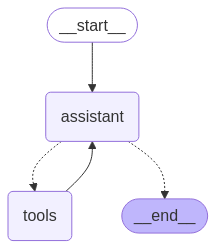

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

Start chatbot

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What can you do?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: whats 1+1
Assistant: 
Assistant: 2
Assistant: The answer to your question, "what's 1+1", is 2.
User: whats the solution to the problem in /content/simple.docx
Assistant: 
Assistant: input=InputDocument(file=PurePosixPath('simple.docx'), document_hash='8d25c333df4c1e2a127d1e098dd464d669575c66d7ebb6a90e5835cbe6e154cb', valid=True, limits=DocumentLimits(max_num_pages=9223372036854775807, max_file_size=9223372036854775807, page_range=(1, 9223372036854775807)), format=<InputFormat.DOCX: 'docx'>, filesize=13329, page_count=0) status=<ConversionStatus.SUCCESS: 'success'> errors=[] pages=[] assembled=AssembledUnit(elements=[], body=[], headers=[]) timings={} document=DoclingDocument(schema_name='DoclingDocument', version='1.3.0', name='simple', origin=DocumentOrigin(mimetype='application/vnd.openxmlformats-officedocument.wordprocessingml.document', binary_hash=1033635264349689035, filename='simple.docx', uri=None), furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], con

TODO
- besseres model finden
- datensätze

# Agent with create_react_agent
tried building an agent based on [this](https://langchain-ai.github.io/langgraph/reference/prebuilt/#langgraph.prebuilt.chat_agent_executor.create_react_agent). currently stuck in an endless loop and i don't know why...

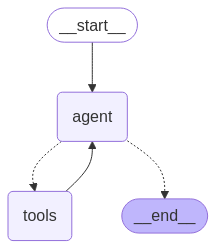

================================ Human Message =================================

what are the solutions for /content/simple2.docx
================================== Ai Message ==================================
Tool Calls:
  pdfFormula (d3ada6b2-0885-4ecc-b27a-f0be438d588c)
 Call ID: d3ada6b2-0885-4ecc-b27a-f0be438d588c
  Args:
    filepath: /content/simple2.docx
================================= Tool Message =================================
Name: pdfFormula

input=InputDocument(file=PurePosixPath('simple2.docx'), document_hash='1a673192a2aeaa77592d4844b0b0b602927dc51865445b7b3d7fc7de8e787edf', valid=True, limits=DocumentLimits(max_num_pages=9223372036854775807, max_file_size=9223372036854775807, page_range=(1, 9223372036854775807)), format=<InputFormat.DOCX: 'docx'>, filesize=13471, page_count=0) status=<ConversionStatus.SUCCESS: 'success'> errors=[] pages=[] assembled=AssembledUnit(elements=[], body=[], headers=[]) timings={} document=DoclingDocument(schema_name='DoclingDocument', 

}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 40
}
].


================================== Ai Message ==================================
Tool Calls:
  calculator (fd7584b3-2818-4487-bce2-1d1abd3aed78)
 Call ID: fd7584b3-2818-4487-bce2-1d1abd3aed78
  Args:
    expression: 3*2+10
================================= Tool Message =================================
Name: calculator

16


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 38
}
]

In [46]:
from langgraph.prebuilt import create_react_agent
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful agent tasked to solve mathematical problems.
                  If a file is provided, use the `pdfFormula` tool first to extract the math problems.
                  For each math problem: call the calculator tool to compute the result, remember the result and proceed with the next problem
                  In the end: return all solutions in the following format: Task 1: <task1> solution: <solution>
                  Do not call the same tool repeatedly."""),
    ("placeholder", "{messages}"),
    ("user", "Remember, always be polite!"),
])


tools = [calculator, pdfFormula]
graph = create_react_agent(model, tools=tools, prompt=prompt)
inputs = {"messages": [("user", "what are the solutions for /content/simple2.docx")]}

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

for s in graph.stream(inputs, stream_mode="values"):
  message = s["messages"][-1]
  if isinstance(message, tuple):
    print(message)
  else:
    message.pretty_print()

# Agent Executor
trying to implement the agent based on [this](https://python.langchain.com/docs/how_to/migrate_agent/)

In [ ]:
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.datamodel.base_models import InputFormat
import math
import numexpr

# for Markdown rendering in Colab
from IPython.display import display, Markdown

@tool
def pdfReader(filepath:str):
  """ get file content using docling

  Args:
      filepath (str): path to file

  Returns:
      str: file content
  """

  pipeline_options = PdfPipelineOptions()
  pipeline_options.do_formula_enrichment = True
  images_scale: float = 1

  converter = DocumentConverter(format_options={
      InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
  })

  result = converter.convert(filepath)
  doc = result.document.export_to_markdown()

  display(Markdown(doc))


  return doc

@tool
def calc(expression: str) -> str:
    """Calculate expression using Python's numexpr library.

    Expression should be a single line mathematical expression
    that solves the problem.

    Examples:
        "37593 * 67" for "37593 times 67"
        "37593**(1/5)" for "37593^(1/5)"
    """
    local_dict = {"pi": math.pi, "e": math.e}
    return str(
        numexpr.evaluate(
            expression.strip(),
            global_dict={},  # restrict access to globals
            local_dict=local_dict,  # add common mathematical functions
        )
    )


In [ ]:
tools = [calc, pdfReader]
query = "Whats the solution for the math problem in /content/simple.docx"

In [ ]:
from langchain_core.tools import tool
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant"),
        ("human", "{input}"),
        # Placeholders fill up a **list** of messages
        ("placeholder", "{agent_scratchpad}"),
    ]
)


agent = create_tool_calling_agent(model, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)

agent_executor.invoke({"input": query})

4+4

{'input': 'Whats the solution for the math problem in /content/simple.docx',
 'output': "<|python_tag|>import docx\n\n# Load the docx file\ndoc = docx.Document('/content/simple.docx')\n\n# Extract the text from the document\ntext = []\nfor para in doc.paragraphs:\n    text.append(para.text)\ndoc_text = '\\n'.join(text)\n\nprint(doc_text)"}